# Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto consiste en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permite a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. Se aplica la creación de gráficos, personalización de estilos y se combina con el desarrollo de programas con Python.

## Datos

1. **Carga de un DataFrame** con los datos meteorológicos provistos en un archivo externo.
2. Se convierten las **fechas** a **formato correcto** para su manipulación posterior.
3. Se crea un programa que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en el DataFrame, y un **mes** del año.
4. Se muestra un grafico al usuario donde estan las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#1. Carga de un DataFrame con los datos meteorológicos provistos en un archivo externo.
df = pd.read_csv(r"C:\Users\juani\OneDrive\Escritorio\Proyectos\01.Data\01 Python\05BloqueMatplotlib\ConsultaTemperaturas\Archivos\Datos+Meteorológicos_Arg_2023.csv")
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [23]:
#2. Se convierten las **fechas** a **formato correcto** para su manipulación posterior.
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,2023-12-31,Buenos Aires,15,12,0.0,17.9,49.2
1821,2023-12-31,Cordoba,15,7,0.0,17.8,62.4
1822,2023-12-31,Rosario,14,8,0.0,38.2,31.2
1823,2023-12-31,Mendoza,13,9,84.8,27.6,35.3


Ciudades disponibles: 
Buenos Aires
Cordoba
Rosario
Mendoza
Tucuman


Selecciona una ciudad:  Rosario
Selecciona un mes (1 al 12):  3


Los datos para Rosario en el mes de 3
         Fecha   Ciudad  Temperatura Maxima  Temperatura Minima  \
297 2023-03-01  Rosario                  30                  22   
302 2023-03-02  Rosario                  30                  17   
307 2023-03-03  Rosario                  26                  17   
312 2023-03-04  Rosario                  30                  19   
317 2023-03-05  Rosario                  24                  20   
322 2023-03-06  Rosario                  22                  15   
327 2023-03-07  Rosario                  24                  19   
332 2023-03-08  Rosario                  23                  18   
337 2023-03-09  Rosario                  28                  22   
342 2023-03-10  Rosario                  31                  18   
347 2023-03-11  Rosario                  26                  18   
352 2023-03-12  Rosario                  32                  20   
357 2023-03-13  Rosario                  25                  22   
362 2023-03-14  Rosario 

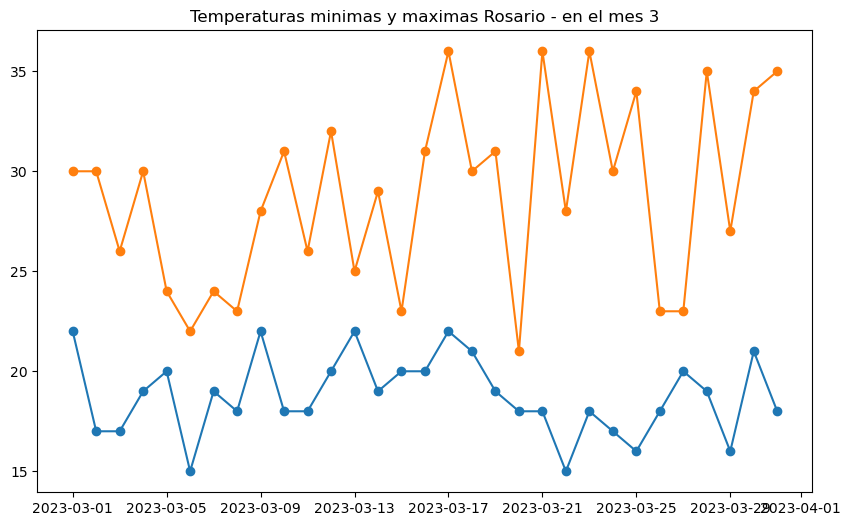

In [47]:
#3. Se crea un programa que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en el DataFrame, y un **mes** del año.

#Se muestran ciudades disponibles
print("Ciudades disponibles: ")
for ciudad in df['Ciudad'].unique():
    print(f'{ciudad}')
    
#Peticion al usuario de la ciudad.
seleccion_ciudad = input('Selecciona una ciudad: ')

#Validacion de las ciudades
if seleccion_ciudad not in df['Ciudad'].unique():
    print('La ciudad no se encuntra en la base')
else:
    #Peticion al usuario del mes.
    seleccion_mes = input('Selecciona un mes (1 al 12): ')
    try:
        seleccion_mes = int(seleccion_mes)
        if seleccion_mes < 1 or seleccion_mes > 12:
            print('El mes no se encuentra en la base')
        else:
            #Filtrar las selecciones del usuario.
            df_filtrado = df[
                (df['Ciudad'] == seleccion_ciudad) &
                (df['Fecha'].dt.month == seleccion_mes)
            ]
            #Mostrar datos solicitados.
            if df_filtrado.empty:
                print(f'No hay datos disponibles para la ciudad {seleccion_ciudad} en el mes {seleccion_mes}')
            else:
                print(f'Los datos para {seleccion_ciudad} en el mes de {seleccion_mes}')
                print(df_filtrado)
    except:
        print('Ingresar un dato correcto para el mes')
        
#4. Se muestra un grafico al usuario donde estan las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
#Filtrar datos
df_filtrado = df[(df['Ciudad'] == seleccion_ciudad) & (df['Fecha'].dt.month == seleccion_mes)]

if df_filtrado.empty:
    print(f'No hay datos para la {seleccion_ciudad} en el mes {seleccion_mes}')
else:
    #Grafico
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['Fecha'], df_filtrado['Temperatura Minima'], marker='o', label='Temperatura Minima')
    plt.plot(df_filtrado['Fecha'], df_filtrado['Temperatura Maxima'], marker='o', label='Temperatura Maxima')
    plt.title(f'Temperaturas minimas y maximas {seleccion_ciudad} - en el mes {seleccion_mes}')